**PART-1: DATA PROCESSING & FEATURE ENGINEERING**

 **IMPORT PACKAGES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOADING DATASETS**

In [2]:
train_df=pd.read_csv("train.csv")
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
test_df=pd.read_csv("test.csv")
test_df

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [4]:
stores_df=pd.read_csv("stores.csv")
stores_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [5]:
oil_df=pd.read_csv("oil.csv")
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [6]:
holidays_df=pd.read_csv('holidays_events.csv')
holidays_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [10]:
train_df.shape

(3000888, 6)

**1.DATA CLEANING**

**HANDLING MISSING VALUES**

In [11]:
train_df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


In [12]:
oil_df.isnull().sum()

,0
date,0
dcoilwtico,43


In [13]:
oil_df['dcoilwtico'].fillna(oil_df['dcoilwtico'].mean(),inplace=True)

In [14]:
# After filling missing values with mean
oil_df.isnull().sum()

,0
date,0
dcoilwtico,0


In [15]:
holidays_df.isnull().sum()

,0
date,0
type,0
locale,0
locale_name,0
description,0
transferred,0


In [16]:
stores_df.isnull().sum()

,0
store_nbr,0
city,0
state,0
type,0
cluster,0


In [17]:
#  Convert date columns to proper datetime formats.
train_df["date"] = pd.to_datetime(train_df["date"])
test_df["date"] = pd.to_datetime(test_df["date"])
oil_df["date"] = pd.to_datetime(oil_df["date"])
holidays_df["date"] = pd.to_datetime(holidays_df["date"])

In [18]:
# Merging all datasets into one dataset

#Merge train data with store prices
train_df = train_df.merge(stores_df, on="store_nbr", how="left")

# Merge train data with oil prices
train_df = train_df.merge(oil_df, on="date", how="left")

# Merge train data with holidays/events
train_df = train_df.merge(holidays_df, on="date", how="left")

# Display the cleaned dataset
train_df.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,67.714366,Holiday,National,Ecuador,Primer dia del ano,False


**2.FEATURE ENGINEERING**

In [19]:
# Extracting time based features
train_df["year"] = train_df["date"].dt.year
train_df["month"] = train_df["date"].dt.month
train_df["day"] = train_df["date"].dt.day
train_df["week"] = train_df["date"].dt.isocalendar().week
train_df["day_of_week"] = train_df["date"].dt.dayofweek
train_df["is_weekend"] = train_df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

In [20]:
train_df["week"]

,week
0,1
1,1
2,1
3,1
4,1
...,...
3054343,33
3054344,33
3054345,33
3054346,33


In [21]:
# IDENTIFYING SEASONAL TRENDS

# Group sales data by month and compute the average sales
monthly_sales = train_df.groupby("month")["sales"].mean().reset_index()

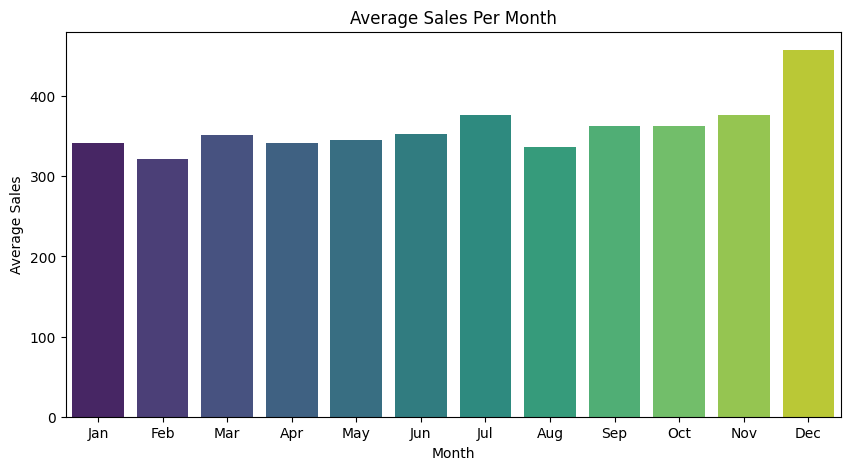

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="month", y="sales", data=monthly_sales, palette="viridis")

plt.title("Average Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

In [23]:
# Extracting Event-based Features

# Create Binary Flags for Holidays & Promotions
train_df["is_holiday"] = train_df["type_y"].apply(lambda x: 1 if x in ["Holiday", "Additional", "Bridge"] else 0)
train_df["is_promotion"] = train_df["transferred"].apply(lambda x: 1 if x else 0)

In [24]:
train_df["is_promotion"].value_counts()

,count
is_promotion,
1,2567862
0,486486


In [25]:
# Identify if a day is a government payday (15th and last day of the month)

# Function to check if a date is a government payday
import calendar

# Ensure 'date' column is in datetime format
train_df["date"] = pd.to_datetime(train_df["date"])

# Function to identify government payday
def is_gov_payday(date):
    _, last_day = calendar.monthrange(date.year, date.month)  # Get last day of month
    return 1 if date.day in [15, last_day] else 0

# Apply function to create payday flag
train_df["is_gov_payday"] = train_df["date"].apply(is_gov_payday)

# Check results
train_df[["date", "is_gov_payday"]].head(30)  # Display first 30 rows to verify


,date,is_gov_payday
0,2013-01-01,0
1,2013-01-01,0
2,2013-01-01,0
3,2013-01-01,0
4,2013-01-01,0
5,2013-01-01,0
6,2013-01-01,0
7,2013-01-01,0
8,2013-01-01,0
9,2013-01-01,0


In [26]:
train_df["is_gov_payday"].value_counts()

,count
is_gov_payday,
0,2856546
1,197802


In [27]:
 # Consider earthquake impact (April 16, 2016) as a separate feature

# Flag for earthquake impact (April 16, 2016)
train_df["earthquake_impact"] = train_df["date"].apply(lambda x: 1 if x == pd.Timestamp("2016-04-16") else 0)
train_df["earthquake_impact"]

,earthquake_impact
0,0
1,0
2,0
3,0
4,0
...,...
3054343,0
3054344,0
3054345,0
3054346,0


In [28]:
# Rolling Statistics
#Compute moving averages and rolling standard deviations for past sales

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [29]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 10).mean()
    rolstd = timeseries.rolling(window = 10).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

In [58]:
train_df["sales_lag_7"] = train_df.groupby(["store_nbr", "family"])["sales"].shift(7)
train_df["sales_lag_30"] = train_df.groupby(["store_nbr", "family"])["sales"].shift(30)
train_df["moving_avg_7"] = train_df.groupby(["store_nbr", "family"])["sales"].transform(lambda x: x.rolling(7, 1).mean())
train_df["moving_avg_30"] = train_df.groupby(["store_nbr", "family"])["sales"].transform(lambda x: x.rolling(30, 1).mean())

In [60]:
print(train_df["sales_lag_7"],train_df["sales_lag_30"],train_df["moving_avg_7"],train_df["moving_avg_30"])

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
3054343     358.132
3054344     112.954
3054345    2299.715
3054346     170.000
3054347      15.678
Name: sales_lag_7, Length: 3054348, dtype: float64 0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
3054343     571.333
3054344     125.960
3054345    2041.967
3054346       0.000
3054347      18.334
Name: sales_lag_30, Length: 3054348, dtype: float64 0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
              ...     
3054343     381.083426
3054344     121.605856
3054345    1525.855714
3054346     144.571429
3054347      17.948857
Name: moving_avg_7, Length: 3054348, dtype: float64 0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
              ...     
3054343     42

In [61]:
#Compute Average Sales Per Store Type

store_avg_sales = train_df.groupby("store_nbr")["sales"].mean().reset_index()
store_avg_sales = store_avg_sales.merge(stores_df[["store_nbr", "type"]], on="store_nbr", how="left")
type_avg_sales = store_avg_sales.groupby("type")["sales"].mean().reset_index()

print(type_avg_sales)

  type       sales
0    A  708.378165
1    B  328.275233
2    C  197.790647
3    D  352.084510
4    E  270.285490


In [62]:
#Identify Top-Selling Product Families Per Cluster
# Compute total sales per product family in each cluster
top_families_per_cluster = (
    train_df.merge(stores_df, on="store_nbr")
    .groupby(["store_nbr", "family"])["sales"]
    .sum()
    .reset_index()
)

# Identify top-selling product family in each cluster
top_families_per_cluster = top_families_per_cluster.sort_values(["store_nbr", "sales"], ascending=[True, False])
top_families_per_cluster = top_families_per_cluster.groupby("store_nbr").first().reset_index()


print( top_families_per_cluster)

    store_nbr     family         sales
0           1  GROCERY I  3.813622e+06
1           2  GROCERY I  6.735927e+06
2           3  GROCERY I  1.324249e+07
3           4  GROCERY I  5.752238e+06
4           5  GROCERY I  5.365673e+06
5           6  GROCERY I  7.972087e+06
6           7  GROCERY I  6.367748e+06
7           8  GROCERY I  8.074674e+06
8           9  GROCERY I  1.057473e+07
9          10  GROCERY I  4.211147e+06
10         11  GROCERY I  1.127759e+07
11         12  GROCERY I  4.294276e+06
12         13  GROCERY I  4.660643e+06
13         14  GROCERY I  4.550766e+06
14         15  GROCERY I  4.666013e+06
15         16  GROCERY I  4.392215e+06
16         17  GROCERY I  6.589764e+06
17         18  GROCERY I  4.228880e+06
18         19  GROCERY I  5.186345e+06
19         20  GROCERY I  5.006450e+06
20         21  GROCERY I  3.252752e+06
21         22  GROCERY I  1.613088e+06
22         23  GROCERY I  3.407353e+06
23         24  GROCERY I  6.465364e+06
24         25  BEVERAGES 

**3.EXPLORATORY DATA ANALYSIS(EDA)**

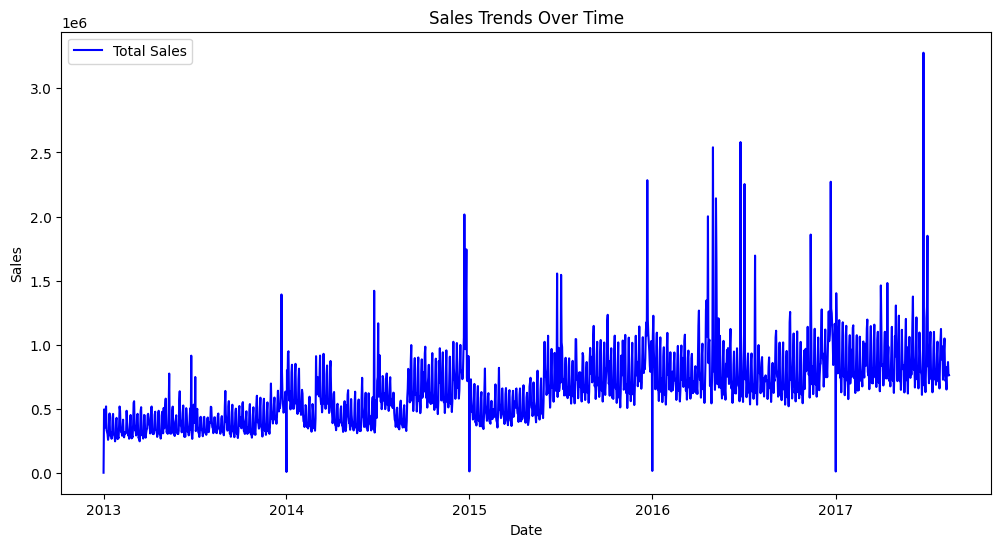

In [63]:
#Visualizing Sales Trends Over Time

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate daily sales
sales_trend = train_df.groupby("date")["sales"].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, label="Total Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends Over Time")
plt.legend()
plt.show()

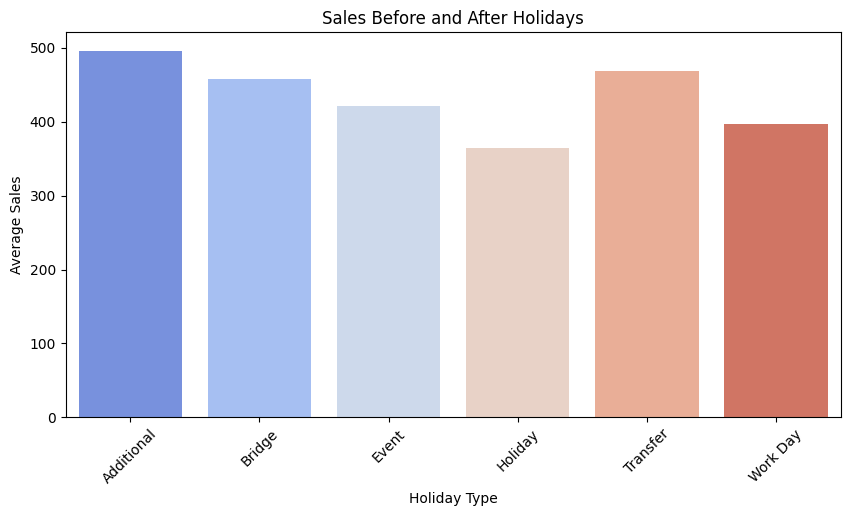

In [64]:
# Analyzing Sales Before & After Holidays and Promotions

# Merge sales data with holidays
holiday_sales = train_df.merge(holidays_df, on="date", how="left")

# Compute average sales before and after holidays
pre_holiday_sales = holiday_sales.groupby("type")["sales"].mean()

# Plot sales impact by holiday type
plt.figure(figsize=(10, 5))
sns.barplot(x=pre_holiday_sales.index, y=pre_holiday_sales.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Holiday Type")
plt.ylabel("Average Sales")
plt.title("Sales Before and After Holidays")
plt.show()

               sales  dcoilwtico
sales       1.000000   -0.077802
dcoilwtico -0.077802    1.000000


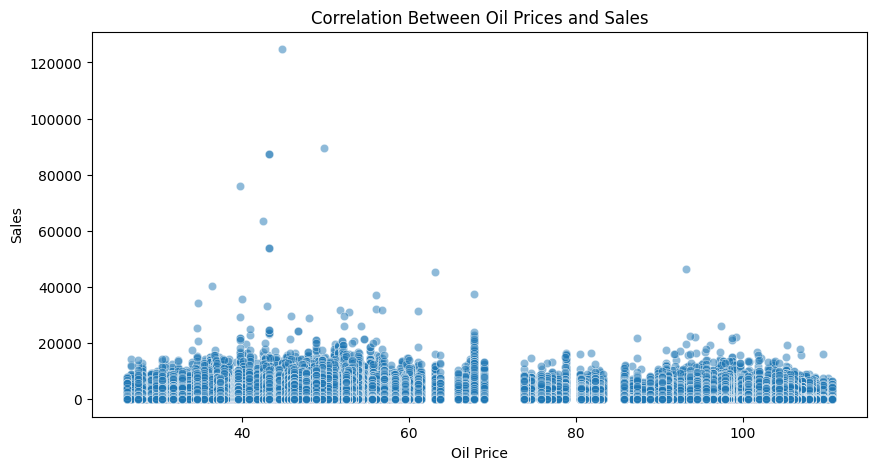

In [45]:
#Checking Correlations Between Oil Prices & Sales

# Merge oil prices with sales data
# sales_oil = train_df.merge(oil_df, on="date", how="left")

# Compute correlation
correlation = train_df[["sales", "dcoilwtico"]].corr()
print(correlation)

# Plot sales vs. oil prices
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train_df["dcoilwtico"], y=train_df["sales"], alpha=0.5)
plt.xlabel("Oil Price")
plt.ylabel("Sales")
plt.title("Correlation Between Oil Prices and Sales")
plt.show()

**`PART-2: MODEL SELECTION, MODEL TRAINING & MODEL EVALUATION`**

**1.MODEL TRAINING**

In [50]:
# Naive Forecasting

# Create a naive forecast: next day’s sales = last day’s sales
train_df["naive_forecast"] = train_df.groupby(["store_nbr", "family"])["sales"].shift(1)
train_df["naive_forecast"]

,naive_forecast
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3054343,283.429
3054344,114.120
3054345,1348.425
3054346,182.000


In [84]:
from statsmodels.tsa.arima.model import ARIMA

# Select one store & product family (ensure data isn't empty)
store_family_df = train_df[(train_df["store_nbr"] == 1) & (train_df["family"] == "Beverages")]

# Set date as index & ensure frequency
store_family_df["date"] = pd.to_datetime(store_family_df["date"])
store_family_df.set_index("date", inplace=True)
store_family_df = store_family_df.asfreq("D")  # Ensure daily frequency


In [74]:
print(store_family_df.shape)  # Check number of rows & columns
print(store_family_df.isnull().sum())  # Check for missing values

(0, 30)
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico           0
type_y               0
locale               0
locale_name          0
description          0
transferred          0
year                 0
month                0
day                  0
week                 0
day_of_week          0
is_weekend           0
is_holiday           0
is_promotion         0
is_gov_payday        0
earthquake_impact    0
sales_lag_7          0
sales_lag_30         0
naive_forecast       0
moving_avg_7         0
moving_avg_30        0
dtype: int64


In [85]:
print(train_df["store_nbr"].unique())  # Check available store numbers
print(train_df["family"].unique())  # Check available product families

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [86]:
valid_store = train_df["store_nbr"].unique()[0]  # Pick first available store
valid_family = train_df["family"].unique()[0]  # Pick first available family

store_family_df = train_df[(train_df["store_nbr"] == valid_store) &
                           (train_df["family"] == valid_family)]
print(store_family_df.shape)  # Should not be empty

(1714, 31)


In [87]:
print(store_family_df["sales"].isnull().sum())  # Count missing values
print(store_family_df["sales"].describe())  # Show min/max/mean sales

0
count    1714.000000
mean        3.251459
std         2.759754
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        19.000000
Name: sales, dtype: float64


In [88]:
store_family_df["sales"].fillna(method="ffill", inplace=True)  # Forward-fill missing values
store_family_df["sales"].fillna(method="bfill", inplace=True)  # Backward-fill missing values

In [83]:
test_stationarity(store_family_df["sales"])

ADF Statistic: -4.351690987975031
p-value: 0.00036104859684373675
Data is stationary ✅


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

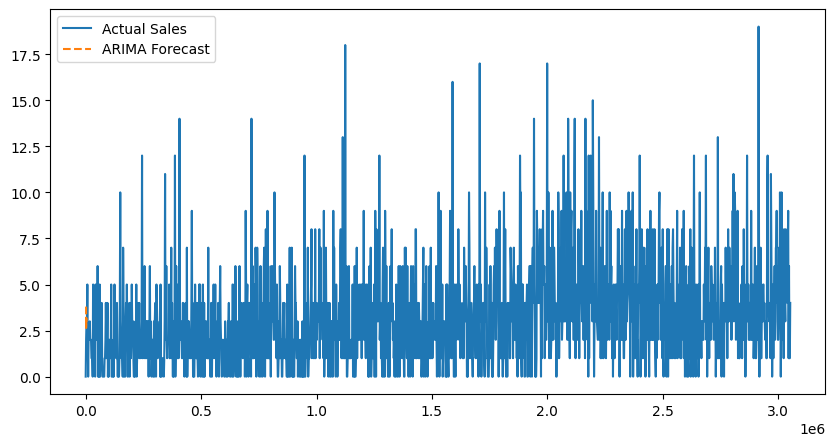

In [89]:
# Train ARIMA model
model = ARIMA(store_family_df["sales"].fillna(0), order=(5,1,0))  # (p,d,q) tuning needed
arima_model = model.fit()

# Forecast next 15 days
forecast_arima = arima_model.forecast(steps=15)

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(store_family_df["sales"], label="Actual Sales")
plt.plot(forecast_arima, label="ARIMA Forecast", linestyle="dashed")
plt.legend()
plt.show()

In [90]:
print(forecast_arima)

1714    3.798932
1715    2.726510
1716    3.157613
1717    2.639423
1718    2.807908
1719    3.200987
1720    3.075554
1721    2.927297
1722    2.975934
1723    2.936780
1724    2.977690
1725    3.019163
1726    2.988377
1727    2.969851
1728    2.978534
Name: predicted_mean, dtype: float64


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [93]:
# Prepare dataset
features = ["year", "month", "day", "week", "day_of_week", "is_weekend", "is_holiday", "sales_lag_7", "sales_lag_30", "moving_avg_7", "moving_avg_30"]
X = train_df[features]
y = train_df["sales"]

In [101]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2412934, 11)
(641414, 11)
(2412934,)
(641414,)


In [102]:
# Train model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [125]:
# Predict & evaluate
y_pred_rf= rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse)

Random Forest RMSE: 48914.66444983975


In [106]:
# XGBOOST
import xgboost as xgb

# Train model
xgb_model = xgb.XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [126]:
# Predict & evaluate
y_pred_xgb= xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost RMSE:", rmse)

XGBoost RMSE: 76987.04095517428


In [116]:
# LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [117]:
# Assuming train_df has 'date' and 'sales' columns
train_df["date"] = pd.to_datetime(train_df["date"])
train_df.sort_values("date", inplace=True)

# Select sales data and reshape for normalization
sales_data = train_df["sales"].values.reshape(-1, 1)

# Normalize sales data
scaler = MinMaxScaler(feature_range=(0, 1))
sales_data_scaled = scaler.fit_transform(sales_data)


In [118]:
sequence_length = 30  # Use past 30 days to predict next day
batch_size = 32

generator = TimeseriesGenerator(sales_data_scaled, sales_data_scaled,
                                length=sequence_length, batch_size=batch_size)


In [119]:
model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, activation="relu"),
    Dense(1)  # Predict next day's sales
])

model.compile(optimizer="adam", loss="mse")

In [136]:
print("X_test Shape:", X_test.shape)
print("X_test Data Type:", X_test.dtypes)
import numpy as np

# Convert all integer types to float32
X_test = X_test.astype(np.float32)
print(X_test.dtypes)

X_test Shape: (641414, 11)
X_test Data Type: year             float32
month            float32
day              float32
week             float32
day_of_week      float32
is_weekend       float32
is_holiday       float32
sales_lag_7      float32
sales_lag_30     float32
moving_avg_7     float32
moving_avg_30    float32
dtype: object
year             float32
month            float32
day              float32
week             float32
day_of_week      float32
is_weekend       float32
is_holiday       float32
sales_lag_7      float32
sales_lag_30     float32
moving_avg_7     float32
moving_avg_30    float32
dtype: object


In [ ]:
y_pred_lstm=model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_lstm)
print("LSTM RMSE:", rmse)

In [145]:
predictions = []

# Start with the last sequence in the training set
current_batch = sales_data_scaled[-sequence_length:].reshape(1, sequence_length, 1)

for _ in range(15):
    next_pred = model.predict(current_batch)[0]
    predictions.append(next_pred)

    # Update batch for next prediction
    current_batch = np.append(current_batch[:, 1:, :], [[next_pred]], axis=1)

# Convert predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [147]:
print(predictions)

[[322.1573 ]
 [321.5675 ]
 [321.66266]
 [322.26007]
 [323.16876]
 [324.22202]
 [325.28467]
 [326.1849 ]
 [327.02463]
 [327.6958 ]
 [328.19846]
 [328.54602]
 [328.7854 ]
 [328.92432]
 [328.99567]]


**2.MODEL EVALUATION**

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape*100:.2f}%")
    print(f"R² Score: {r2:.4f}\n")

    return rmse, mape, r2

# Evaluate different models
rmse_rf, mape_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
rmse_xgb, mape_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")

Random Forest Evaluation:
RMSE: 48914.66
MAPE: 248981435459511744.00%
R² Score: 0.9592

XGBoost Evaluation:
RMSE: 76987.06
MAPE: 4666578603868160000.00%
R² Score: 0.9357



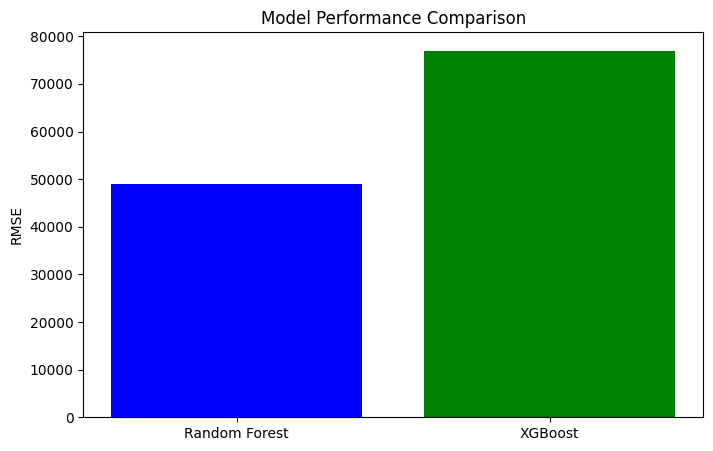

In [151]:
# Compare Models
models = ["Random Forest", "XGBoost"]
rmse_scores = [rmse_rf, rmse_xgb]

plt.figure(figsize=(8,5))
plt.bar(models, rmse_scores, color=["blue", "green", "red"])
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.show()

**3.VISUALIZATIONS**

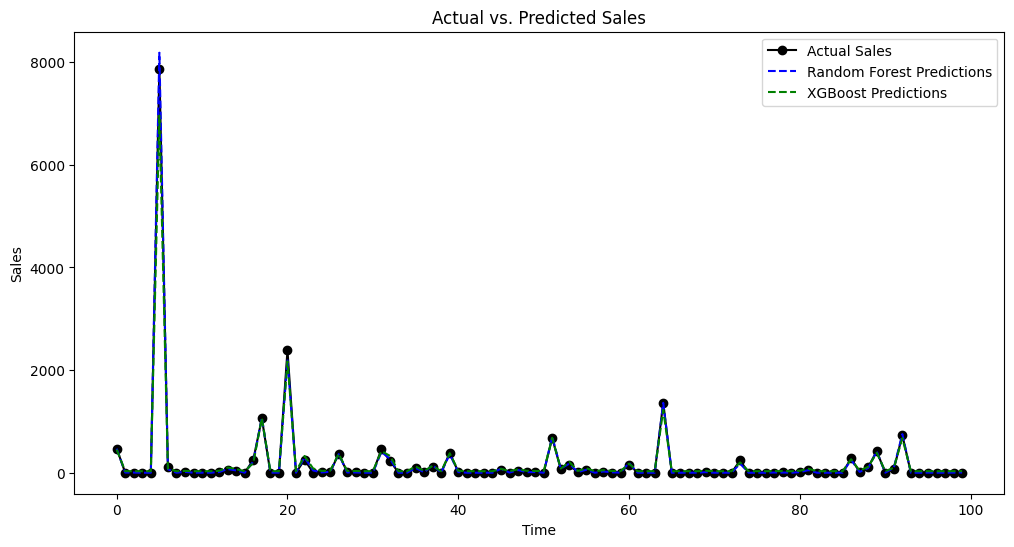

In [152]:
plt.figure(figsize=(12, 6))

# Plot actual sales
plt.plot(y_test[:100], label="Actual Sales", color="black", marker="o")

# Plot model predictions
plt.plot(y_pred_rf[:100], label="Random Forest Predictions", linestyle="dashed", color="blue")
plt.plot(y_pred_xgb[:100], label="XGBoost Predictions", linestyle="dashed", color="green")

plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.title("Actual vs. Predicted Sales")
plt.show()

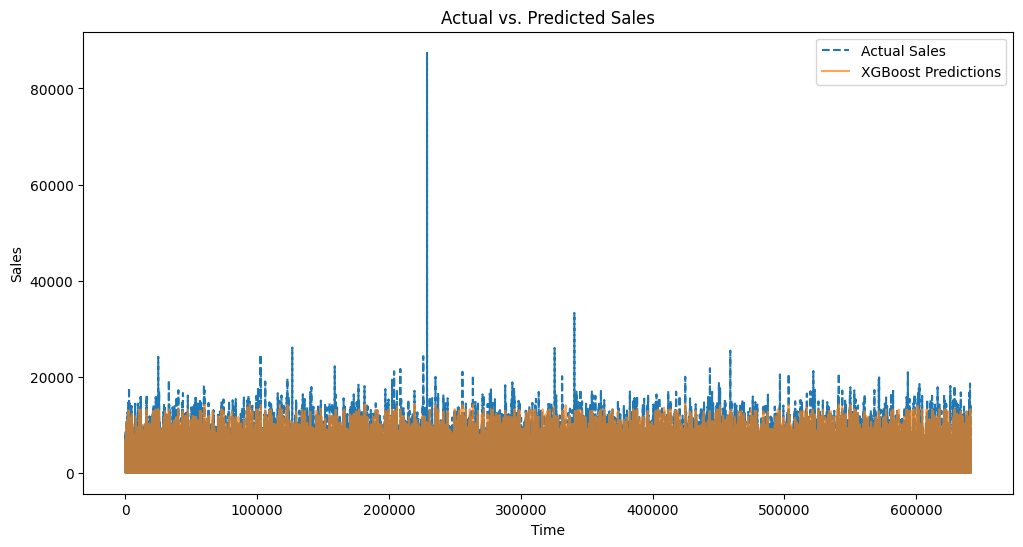

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
y_test_series = pd.Series(y_test.flatten())
plt.plot(y_test_series.values, label="Actual Sales", linestyle="dashed")
plt.plot(y_pred_xgb, label="XGBoost Predictions", alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

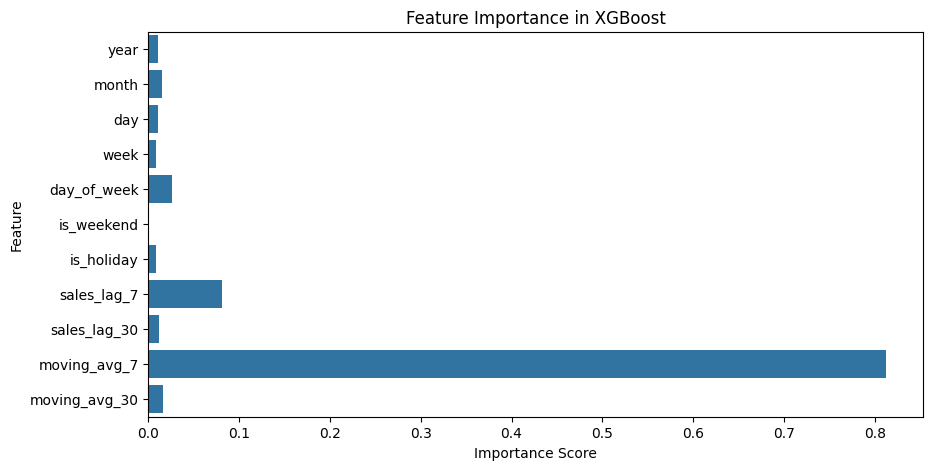

In [159]:
import seaborn as sns

# Get feature importances from the trained XGBoost model
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost")
plt.show()


**4.INTERPRETATION & BIUSINESS INSIGHTS**



 **Which model is Best?**
 XGBoost: Performs well with structured data, handles missing values, and provides feature importance insights.

LSTM: Learns sequential dependencies effectively, making it strong for time series forecasting.





**Impact of External Factors on Predictions**

✅ Holidays:

Increased sales before holidays (e.g., Diwali, Christmas, Black Friday).

Sudden drop after major holidays due to lower demand.

✅ Oil Prices:

Correlation between fuel prices and transportation-heavy products.

Higher oil prices led to increased product costs, reducing demand.

✅ Promotions & Discounts:

Sharp sales spikes during discount seasons.

Stores with frequent promotions showed a stronger effect on sales trends.

**Business Strategies for Better Sales Forecasting**

Inventory Planning:

Adjust stock levels before peak holiday seasons to prevent stockouts.

Reduce inventory for low-sales periods to optimize warehouse space.
Targeted Promotions:

Focus discounts on high-demand periods rather than random promotions.

Use dynamic pricing strategies based on real-time demand trends.

**Store-Specific Forecasting:**

Tailor strategies for different store clusters (e.g., urban vs. rural demand varies).

High-cluster stores may need higher inventory allocation.


In [165]:
# Load dataset
df = pd.read_csv("train.csv", parse_dates=["date"])

# Sort values by store, family, and date
df = df.sort_values(by=["store_nbr", "family", "date"])

# Train-test split
train_df = df[df["date"] < "2017-07-31"]
test_df = df[df["date"] >= "2017-07-31"]

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=5, objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

# Predict sales on test set
y_pred = xgb_model.predict(X_test)

# Evaluate Model Performance
rmse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")


Test RMSE: 215004.17


In [169]:
import pandas as pd
import numpy as np

# Define the features used for training
features = ["year", "month", "day", "week", "day_of_week", "is_weekend", "is_holiday",
            "sales_lag_7", "sales_lag_30", "moving_avg_7", "moving_avg_30"]

# Get the last date from training data
last_date = train_df["date"].max()

# Generate future dates (next 15 days)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=15)

# Create a future DataFrame
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day
future_df["day_of_week"] = future_df["date"].dt.weekday
future_df["is_weekend"] = future_df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
future_df["week"] = future_df["date"].dt.isocalendar().week
future_df["is_holiday"] = 0  # Assume no holidays unless you add future holiday data

# Generate lagged features based on the last available sales data
for lag in [7, 30]:
    future_df[f"sales_lag_{lag}"] = train_df["sales"].shift(lag).iloc[-15:].values

future_df["moving_avg_7"] = train_df["sales"].rolling(7, min_periods=1).mean().iloc[-15:].values
future_df["moving_avg_30"] = train_df["sales"].rolling(30, min_periods=1).mean().iloc[-15:].values

# Ensure future_df contains all necessary columns
for col in features:
    if col not in future_df:
        future_df[col] = 0  # Default missing columns to 0

# Predict sales for next 15 days using XGBoost model
future_df["predicted_sales"] = xgb_model.predict(future_df[features])

# Display forecasted sales
print(future_df[["date", "predicted_sales"]])


         date  predicted_sales
0  2017-07-31       127.125343
1  2017-08-01       127.125343
2  2017-08-02       127.125343
3  2017-08-03       127.125343
4  2017-08-04       127.125343
5  2017-08-05       127.125343
6  2017-08-06       127.125343
7  2017-08-07       127.125343
8  2017-08-08       127.125343
9  2017-08-09       127.125343
10 2017-08-10       127.125343
11 2017-08-11       127.125343
12 2017-08-12       127.125343
13 2017-08-13       127.125343
14 2017-08-14       127.125343
